In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import accuracy_score



In [31]:
data=pd.read_csv("heart.csv")
X=data.drop("DEATH_EVENT",axis=1)
Y=data[["DEATH_EVENT"]]
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.30,random_state=7)

In [32]:
model=LogisticRegression(max_iter=1000)
model.fit(X_train,Y_train)
y_predict=model.predict(X_test)
model_score=model.score(X_test,Y_test)
print(model_score)

0.8333333333333334


c:\users\humna fatimah fakia\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [4]:
cnf_matrix=metrics.confusion_matrix(Y_test,y_predict)
cnf_matrix

array([[58,  7],
       [ 8, 17]], dtype=int64)

In [5]:
Accuracy=metrics.accuracy_score(Y_test,y_predict)*100
Precision=metrics.precision_score(Y_test,y_predict)*100
Recall=metrics.recall_score(Y_test,y_predict)*100
print("Accuracy: ",Accuracy)
print("Precision: ",Precision)
print("Recall: ",Recall)

Accuracy:  83.33333333333334
Precision:  70.83333333333334
Recall:  68.0


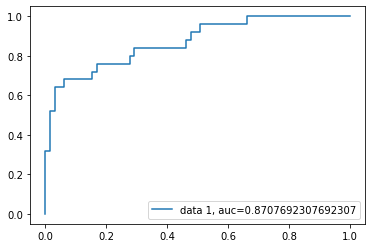

In [6]:
y_pred_proba =model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)
auc = metrics.roc_auc_score(Y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [7]:
lr_pred = model.predict(X_test)

In [8]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, lr_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, lr_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, lr_pred)))

Mean Absolute Error: 0.16666666666666666
Mean Squared Error: 0.16666666666666666
Root Mean Squared Error: 0.408248290463863


In [9]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(Y_test, lr_pred))
print(classification_report(Y_test, lr_pred))

[[58  7]
 [ 8 17]]
              precision    recall  f1-score   support

           0       0.88      0.89      0.89        65
           1       0.71      0.68      0.69        25

    accuracy                           0.83        90
   macro avg       0.79      0.79      0.79        90
weighted avg       0.83      0.83      0.83        90



In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.4 KB


In [11]:
inputFeatures=[75,0,582,0,20,1,265000.00,1.9,130,1,0,4]
infProb=model.predict_proba([inputFeatures])[0][1]
infProb

0.9575733072224544

In [12]:
#Desision Tree

In [13]:
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier()
dt.fit(X_train,Y_train)

DecisionTreeClassifier()

In [14]:
prediction=dt.predict(X_test)
accuracy_dt=accuracy_score(Y_test,prediction)*100
accuracy_dt

86.66666666666667

In [15]:
print("Accuracy on training set: {:.3f}".format(dt.score(X_train, Y_train)))
print("Accuracy on test set: {:.3f}".format(dt.score(X_test, Y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.867


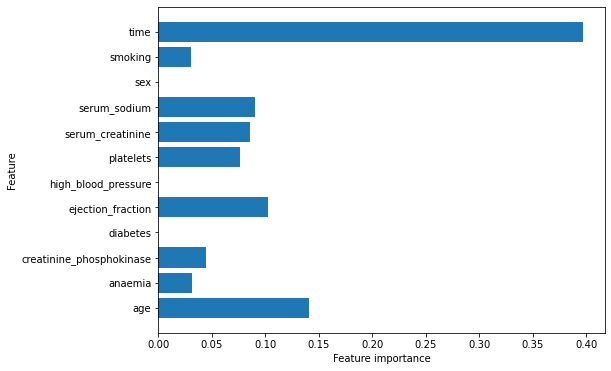

In [16]:
def plot_feature_importances_diabetes(model):
    plt.figure(figsize=(8,6))
    n_features = 12
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
plot_feature_importances_diabetes(dt)
plt.savefig('feature_importance')

In [17]:
y_pred = dt.predict(X_test)

In [18]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(Y_test, y_pred))
print(classification_report(Y_test, y_pred))

[[59  6]
 [ 6 19]]
              precision    recall  f1-score   support

           0       0.91      0.91      0.91        65
           1       0.76      0.76      0.76        25

    accuracy                           0.87        90
   macro avg       0.83      0.83      0.83        90
weighted avg       0.87      0.87      0.87        90



In [19]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))

Mean Absolute Error: 0.13333333333333333
Mean Squared Error: 0.13333333333333333
Root Mean Squared Error: 0.3651483716701107


In [20]:
#KNN 

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
sc=StandardScaler().fit(X_train)
X_train_std=sc.transform(X_train)
X_test_std=sc.transform(X_test)

In [23]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train_std,Y_train)


<ipython-input-23-79ad22333432>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(X_train_std,Y_train)


KNeighborsClassifier(n_neighbors=8)

In [24]:
prediction_knn=knn.predict(X_test_std)
accuracy_knn=accuracy_score(Y_test,prediction_knn)*100

In [25]:
print("Accuracy on training set: {:.3f}".format(knn.score(X_train, Y_train)))
print("Accuracy on test set: {:.3f}".format(knn.score(X_test, Y_test)))

Accuracy on training set: 0.660
Accuracy on test set: 0.722


In [26]:
###Comparison of Algorithms

In [27]:
algos=['Logistic Regression','Decision Tree','KNN']
scores=[Accuracy,accuracy_dt,accuracy_knn]

<BarContainer object of 3 artists>

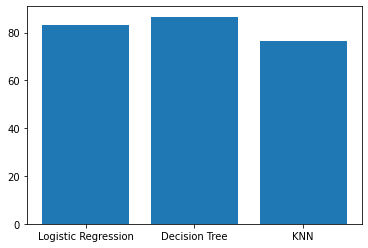

In [28]:
plt.bar(algos,scores)